<a href="https://colab.research.google.com/github/sahithikota23/CodeClauseInternship_winequalityprediction/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Knee-project

/content/drive/.shortcut-targets-by-id/1V41lPa-_s_0gMaM6kaSDAUBVlOmIacX3/Knee-project


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
train_dir='/content/drive/MyDrive/Knee-project/train/'
test_dir='/content/drive/MyDrive/Knee-project/test/'

In [ ]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [ ]:
 1574 + 737

2311

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
 base_model = MobileNetV2(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(train_data_gen, epochs=10,
validation_data= val_data_gen,)

Epoch 1/10
165/165 [==============================] - 652s 4s/step - loss: 2.2012 - accuracy: 0.4564 - val_loss: 0.8043 - val_accuracy: 0.6933
Epoch 2/10
165/165 [==============================] - 218s 1s/step - loss: 0.8418 - accuracy: 0.6952 - val_loss: 0.8426 - val_accuracy: 0.6855
Epoch 3/10
165/165 [==============================] - 236s 1s/step - loss: 0.6646 - accuracy: 0.7618 - val_loss: 0.4437 - val_accuracy: 0.8394
Epoch 4/10
165/165 [==============================] - 215s 1s/step - loss: 0.4933 - accuracy: 0.8139 - val_loss: 0.3343 - val_accuracy: 0.8952
Epoch 5/10
165/165 [==============================] - 216s 1s/step - loss: 0.3715 - accuracy: 0.8733 - val_loss: 0.2805 - val_accuracy: 0.8988
Epoch 6/10
165/165 [==============================] - 215s 1s/step - loss: 0.2659 - accuracy: 0.9127 - val_loss: 0.2404 - val_accuracy: 0.9261
Epoch 7/10
165/165 [==============================] - 216s 1s/step - loss: 0.2329 - accuracy: 0.9182 - val_loss: 0.1612 - val_accuracy: 0.9533

In [ ]:
#classifier.save('knee.h5')

In [ ]:
#pip install Pillow

In [ ]:
import numpy as np

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

165/165 - 64s - 64s/epoch - 385ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[488  12   2   1   0]
 [ 22 422  39   3   2]
 [  0   0 230   2   0]
 [  0   1   3 217   0]
 [  0   0   1   0 205]]
Accuracy: 0.947
Precision: 0.918
Recall: 0.947
F-Measure: 0.947


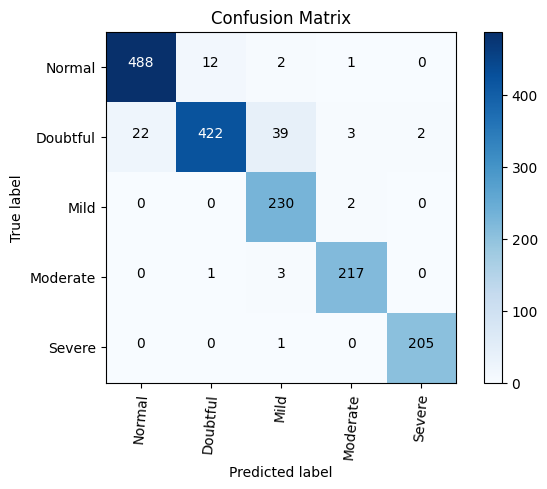

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred


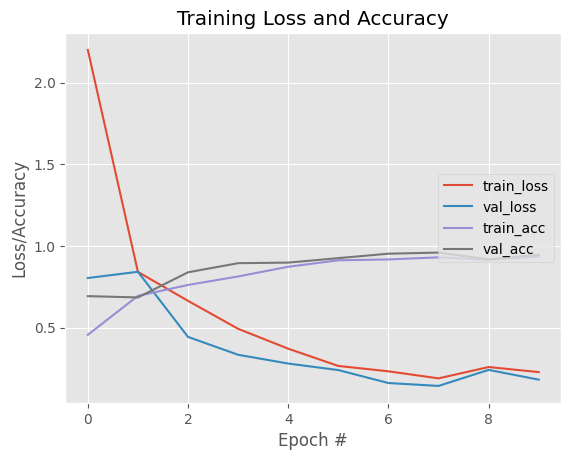

In [ ]:
# plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
#plt.savefig("CNN_Model")